# Capstone Project: Bellabeat Case Study

#### Bellabeat is a high-tect company that manufactures health-focused smart products. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. 
### Business questions to ask
##### 1. What are some trends in smart device usage?
##### 2. How could these trends apply to Bellabeat customers?
##### 3. How could these tredns help influence Belllabeat marketing strategy?


## Phase 1: Ask
#### Business task: Analyse smart device usuage data to gain insight and help influence the Bellabeat marketing strategy. 
#### Primary key stakeholders: Urška Sršen and Sando Mur, cofounders and executive team members. 
#### Secondary team members: Bellabeat marketing analytics team

## Phase 2: Prepare 
#### Data source: 30 participants on FitBit Fitness tracker data from 'Mobius' https://www.kaggle.com/datasets/arashnic/fitbit
#### Public data within 18 CSV files on Kaggle
#### Data format is Long data
#### Data is reliable as it's the submission of personal tracker data by FitBit users and doesn't have leading questions. Just data on how rge devices were used by each participant. 
#### Survey is from March 12th to May 12th 2016 so data is outdated and could be unreliable due to different time trends. Also a small sample size with only 3 months worth of data. 
#### Data license CC0: Public Domain 

## Phase 3: Process

First I started by looking at the data in google sheets and seeing which data I needed for my analysis. I then merged the sheets hourlySteps_merged, hourlyIntensities_merged and hourlyCalories_merged together. Each sheet had the same amount of rows so I copy and pasted the columns I needed onto one sheet. 

#### Installing and loading R packages 

In [1]:
library(tidyverse)
library(janitor)
library(dplyr)
library(ggplot2)
library(tidyr)
library(lubridate)
library(skimr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




#### Importing the data 
I made a zip file with the csv files I needed for my analysis and uploaded the zip file to R studio.

In [2]:
daily_activity <- read_csv("../input/capstone-project-personal-files/dailyActivity_merged.csv")
heartrate_seconds <- read_csv("../input/capstone-project-personal-files/heartrate_seconds_merged.csv")
hourly_activity <- read_csv("../input/capstone-project-personal-files/hourlyActivity.csv")
minute_met <- read_csv("../input/capstone-project-personal-files/minuteMETsNarrow_merged.csv")
minute_sleep <- read_csv("../input/capstone-project-personal-files/minuteSleep_merged.csv")
sleep_day <- read_csv("../input/capstone-project-personal-files/sleepDay_merged.csv")
weight_log_info <- read_csv("../input/capstone-project-personal-files/weightLogInfo_merged.csv")

Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2483658 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Time
dbl (2): Id, Value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 24086 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Id, ActivityHour
dbl (4): Calories, TotalIntensity, AverageIntensity, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set 

#### Inspecting the data using head and clean names

In [3]:
head(daily_activity)
head(minute_sleep)
head(hourly_activity)
head(heartrate_seconds)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


Id,date,value,logId
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 2:47:30 AM,3,11380564589
1503960366,4/12/2016 2:48:30 AM,2,11380564589
1503960366,4/12/2016 2:49:30 AM,1,11380564589
1503960366,4/12/2016 2:50:30 AM,1,11380564589
1503960366,4/12/2016 2:51:30 AM,1,11380564589
1503960366,4/12/2016 2:52:30 AM,1,11380564589


Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,3/12/2016 12:00:00 AM,48,0,0,0
1503960366,3/12/2016 1:00:00 AM,48,0,0,0
1503960366,3/12/2016 2:00:00 AM,48,0,0,0
1503960366,3/12/2016 3:00:00 AM,48,0,0,0
1503960366,3/12/2016 4:00:00 AM,48,0,0,0
1503960366,3/12/2016 5:00:00 AM,48,0,0,0


Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


In [4]:
clean_names(daily_activity)
clean_names(heartrate_seconds)
clean_names(hourly_activity)
clean_names(minute_met)
clean_names(minute_sleep)
clean_names(sleep_day)
clean_names(weight_log_info)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,time,value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95
2022484408,4/12/2016 7:22:10 AM,91
2022484408,4/12/2016 7:22:15 AM,93
2022484408,4/12/2016 7:22:20 AM,94


id,activity_hour,calories,total_intensity,average_intensity,step_total
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,3/12/2016 12:00:00 AM,48,0,0.000000,0
1503960366,3/12/2016 1:00:00 AM,48,0,0.000000,0
1503960366,3/12/2016 2:00:00 AM,48,0,0.000000,0
1503960366,3/12/2016 3:00:00 AM,48,0,0.000000,0
1503960366,3/12/2016 4:00:00 AM,48,0,0.000000,0
1503960366,3/12/2016 5:00:00 AM,48,0,0.000000,0
1503960366,3/12/2016 6:00:00 AM,48,0,0.000000,0
1503960366,3/12/2016 7:00:00 AM,48,0,0.000000,0
1503960366,3/12/2016 8:00:00 AM,48,0,0.000000,0


id,activity_minute,me_ts
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,10
1503960366,4/12/2016 12:01:00 AM,10
1503960366,4/12/2016 12:02:00 AM,10
1503960366,4/12/2016 12:03:00 AM,10
1503960366,4/12/2016 12:04:00 AM,10
1503960366,4/12/2016 12:05:00 AM,12
1503960366,4/12/2016 12:06:00 AM,12
1503960366,4/12/2016 12:07:00 AM,12
1503960366,4/12/2016 12:08:00 AM,12


id,date,value,log_id
<dbl>,<chr>,<dbl>,<dbl>
1503960366,4/12/2016 2:47:30 AM,3,11380564589
1503960366,4/12/2016 2:48:30 AM,2,11380564589
1503960366,4/12/2016 2:49:30 AM,1,11380564589
1503960366,4/12/2016 2:50:30 AM,1,11380564589
1503960366,4/12/2016 2:51:30 AM,1,11380564589
1503960366,4/12/2016 2:52:30 AM,1,11380564589
1503960366,4/12/2016 2:53:30 AM,1,11380564589
1503960366,4/12/2016 2:54:30 AM,2,11380564589
1503960366,4/12/2016 2:55:30 AM,2,11380564589


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12
4319703577,5/4/2016 11:59:59 PM,72.3,159.3942,NA,27.38,TRUE,1.462406e+12
4558609924,4/18/2016 11:59:59 PM,69.7,153.6622,NA,27.25,TRUE,1.461024e+12
4558609924,4/25/2016 11:59:59 PM,70.3,154.9850,NA,27.46,TRUE,1.461629e+12


#### Removing duplicates

In [5]:
sum(duplicated(daily_activity))
sum(duplicated(heartrate_seconds))
sum(duplicated(hourly_activity))
sum(duplicated(minute_met))
sum(duplicated(minute_sleep))
sum(duplicated(sleep_day))
sum(duplicated(weight_log_info))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 543

[1] 3

[1] 0

In [6]:
minute_sleep <- unique(minute_sleep)
sum(duplicated(minute_sleep))

sleep_day <- unique(sleep_day)
sum(duplicated(sleep_day))

[1] 0

[1] 0

#### Ensuring all dates are the same format

In [7]:
daily_activity$ActivityDate=as.Date(daily_activity$ActivityDate, format = "%m/%d/%y")
heartrate_seconds$Time=as.Date(heartrate_seconds$Time, format = "%m/%d/%y")
hourly_activity$ActivityHour=as.Date(hourly_activity$ActivityHour, format = "%m-%d-%y")
minute_met$ActivityMinute=as.Date(minute_met$ActivityMinute, format = "%m-%d-%y")
minute_sleep$date=as.Date(minute_sleep$date, format = "%m-%d-%y")
sleep_day$SleepDay=as.Date(sleep_day$SleepDay, format = "%m-%d-%y")
weight_log_info$Date=as.Date(weight_log_info$Date, format = "%m-%d-%y")


In [8]:
daily_activity %>% 
    summarise(Activity_participants = n_distinct(daily_activity$Id))
n_distinct(heartrate_seconds$Id)
n_distinct(hourly_activity$Id)
n_distinct(minute_met$Id)
n_distinct(minute_sleep$Id)
n_distinct(sleep_day$Id)
n_distinct(weight_log_info)

Activity_participants
<int>
33


[1] 14

[1] 36

[1] 33

[1] 24

[1] 24

[1] 67

I will work with daily_activity, hourly_activity, sleep_day, and weight_log_info

## Phase 4: Analyse

#### Summary of the datasets I'll be working with

In [9]:
daily_activity%>%
  select(TotalSteps, TotalDistance, SedentaryMinutes, Calories) %>%
summary()

   TotalSteps    TotalDistance    SedentaryMinutes    Calories   
 Min.   :    0   Min.   : 0.000   Min.   :   0.0   Min.   :   0  
 1st Qu.: 3790   1st Qu.: 2.620   1st Qu.: 729.8   1st Qu.:1828  
 Median : 7406   Median : 5.245   Median :1057.5   Median :2134  
 Mean   : 7638   Mean   : 5.490   Mean   : 991.2   Mean   :2304  
 3rd Qu.:10727   3rd Qu.: 7.713   3rd Qu.:1229.5   3rd Qu.:2793  
 Max.   :36019   Max.   :28.030   Max.   :1440.0   Max.   :4900  

In [10]:
hourly_activity %>% 
  select(Calories,TotalIntensity, AverageIntensity) %>% 
  summary()

    Calories      TotalIntensity   AverageIntensity 
 Min.   : 42.00   Min.   :  0.00   Min.   :0.00000  
 1st Qu.: 61.00   1st Qu.:  0.00   1st Qu.:0.00000  
 Median : 77.00   Median :  1.00   Median :0.01667  
 Mean   : 94.27   Mean   : 10.83   Mean   :0.18044  
 3rd Qu.:104.00   3rd Qu.: 14.00   3rd Qu.:0.23333  
 Max.   :933.00   Max.   :180.00   Max.   :3.00000  
 NA's   :2        NA's   :2        NA's   :2        

In [11]:
sleep_day %>% 
  select(TotalSleepRecords, TotalMinutesAsleep,
         TotalTimeInBed) %>% 
  summary()

 TotalSleepRecords TotalMinutesAsleep TotalTimeInBed 
 Min.   :1.00      Min.   : 58.0      Min.   : 61.0  
 1st Qu.:1.00      1st Qu.:361.0      1st Qu.:403.8  
 Median :1.00      Median :432.5      Median :463.0  
 Mean   :1.12      Mean   :419.2      Mean   :458.5  
 3rd Qu.:1.00      3rd Qu.:490.0      3rd Qu.:526.0  
 Max.   :3.00      Max.   :796.0      Max.   :961.0  

In [12]:
weight_log_info %>% 
  select(WeightKg, Fat, BMI) %>% 
  summary()

    WeightKg           Fat             BMI       
 Min.   : 52.60   Min.   :22.00   Min.   :21.45  
 1st Qu.: 61.40   1st Qu.:22.75   1st Qu.:23.96  
 Median : 62.50   Median :23.50   Median :24.39  
 Mean   : 72.04   Mean   :23.50   Mean   :25.19  
 3rd Qu.: 85.05   3rd Qu.:24.25   3rd Qu.:25.56  
 Max.   :133.50   Max.   :25.00   Max.   :47.54  
                  NA's   :65                     

Findings:
1. Patricipants on average are walking 7406 steps a day, which is low average.
2. Participants are sedentary for 991 minutes/ 16 hours which is pretty high. 
3. Participants are getting 419 minutes/6.9 hours of sleep, just below recommeded sleep of 7 to 9 hours a night. 
4. Average BMI is 25, healthy range is between 18.5 and 24.9 and overweight is 25 and 29.9. Participants are just slightly in the overweight category

## Phase 5: Share

#### Visulations of the data

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


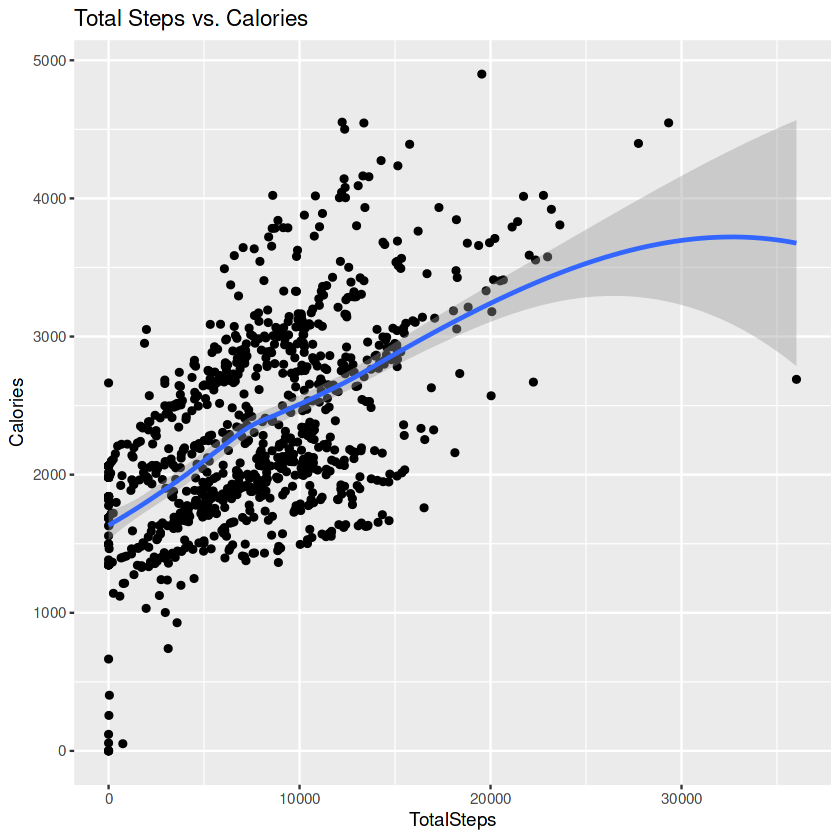

In [13]:
ggplot(data=daily_activity) +
  geom_point(mapping= aes (x= TotalSteps, y= Calories))+
  geom_smooth(mapping=aes(x=TotalSteps, y=Calories))+
  labs(title = "Total Steps vs. Calories")
  

A positive correlation between calories burned with total steps, participants that walk more burn more calories. Online achievements for walking could be good to help reward users to encourage healthy behaviour.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


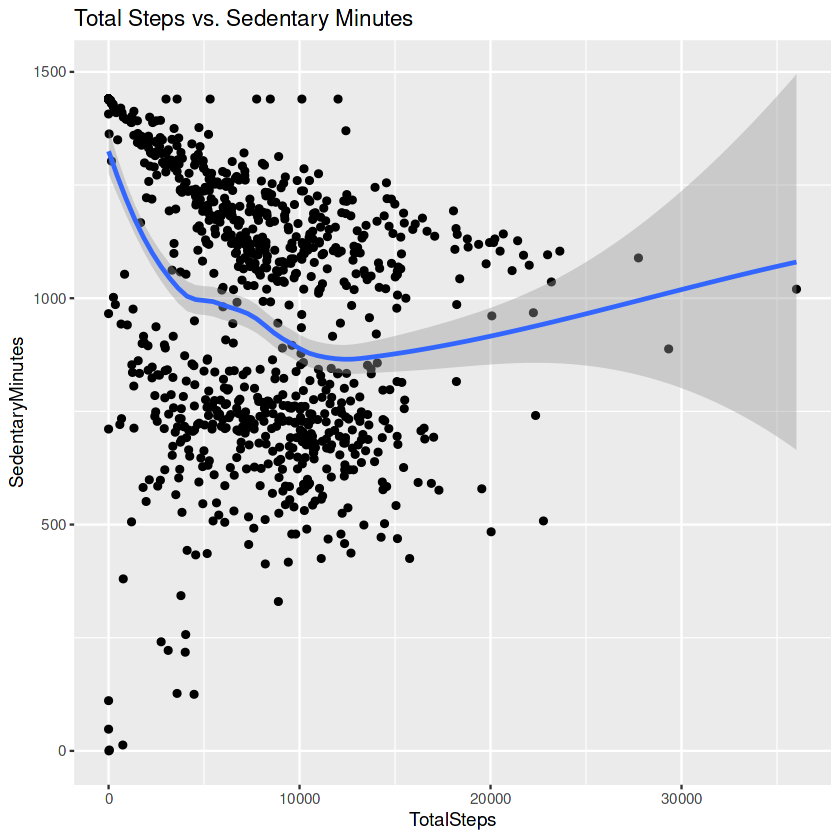

In [14]:
ggplot(data=daily_activity)+
  geom_point(mapping=aes(x=TotalSteps, y=SedentaryMinutes))+
  geom_smooth(mapping=aes(x=TotalSteps, y=SedentaryMinutes))+
  labs(title = "Total Steps vs. Sedentary Minutes")

A negative correlation between total steps and sedentary minutes participants had. Less steps taken were more likely to be more sedentary so we can use this to encourage customers on their fitness journey to get extra steps in when beginning their fitness journey. 

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


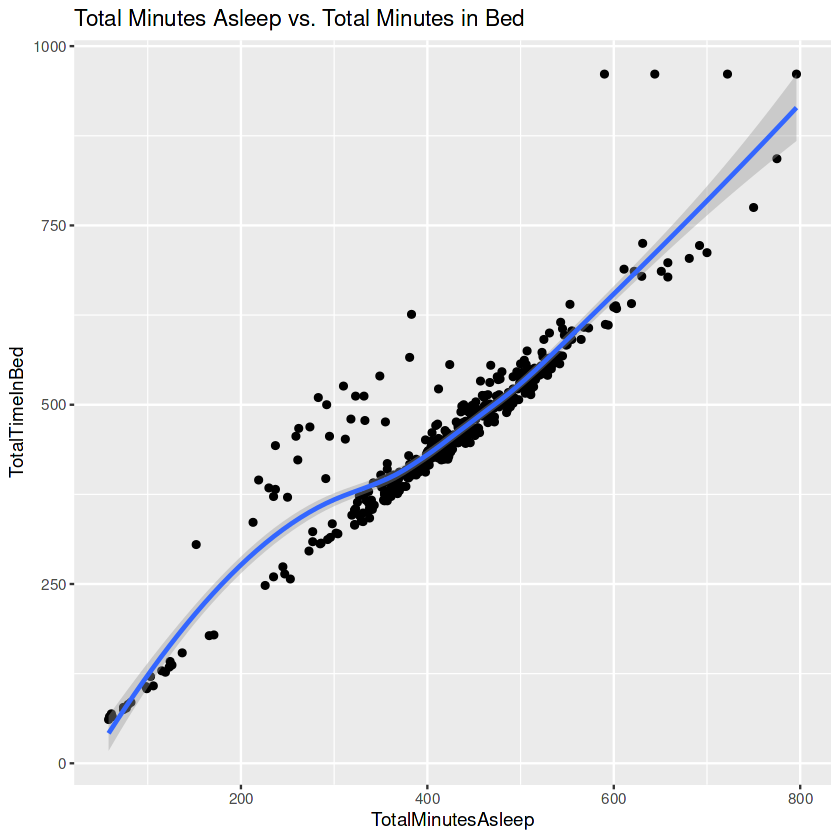

In [15]:
ggplot(sleep_day)+
  geom_point(mapping = aes(x=TotalMinutesAsleep, y=TotalTimeInBed))+
  geom_smooth(mapping = aes(x=TotalMinutesAsleep, y=TotalTimeInBed))+
  labs(title = "Total Minutes Asleep vs. Total Minutes in Bed")

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


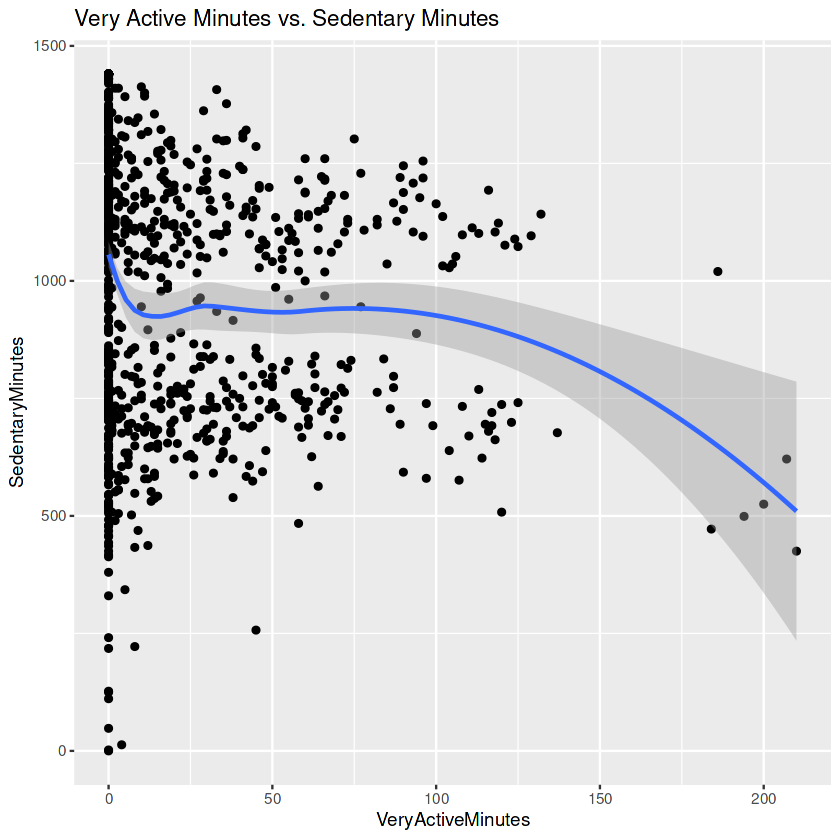

In [16]:
ggplot(data=daily_activity)+
  geom_point(mapping = aes(x=VeryActiveMinutes, y=SedentaryMinutes))+
  geom_smooth(mapping = aes(x=VeryActiveMinutes, y=SedentaryMinutes))+
  labs(title = "Very Active Minutes vs. Sedentary Minutes ")

Slight negative relationship between very active minutes and sedentary minutes showing participants that are not very active live quite sedentary lives while a slight increase in active minutes decreases how sedentary they can be. Prehaps walk and exercise alerts would be ideal to help remind and encourage users to be more active. 

## Conclusion

#### Based on what we've found in our data analysis, it's clear that many of our users aren't very active. So, it would be helpful to add features that encourage them to move more and send alerts to remind them to live healthier. Also, it seems like a lot of users aren't getting enough sleep. They use their smart devices to keep tabs on their habits, which suggests they want to be healthier. Their lack of activity might be because of health issues, just starting out on their fitness journey, or having jobs that keep them sitting all day. By recognizing these trends and adapting our platform to address them, we can better support our users in their quest for a healthier life.

## Phase 6: Act

#### 1. Implement achievement badges or rewards for reaching activity goals to incentivize users to be more active.
#### 2. Introduce sleep reminders to encourage users to establish healthier sleep patterns.
#### 3. Provide tips and strategies for staying asleep if users wake up early, such as creating a relaxing bedtime routine or avoiding caffeine before bed.
#### 4. Set up reminders for regular walking breaks throughout the day to combat sedentary behavior.
#### 5. Incorporate reminders for users to weigh themselves periodically to track progress and maintain accountability for their health goals.